In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_47417_Z')

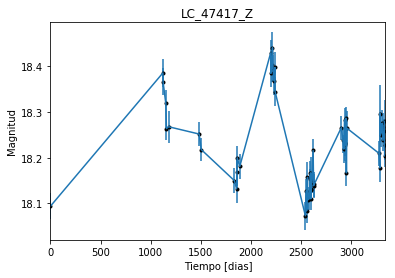

In [2]:
data = np.genfromtxt('LC_47417_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_47417_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

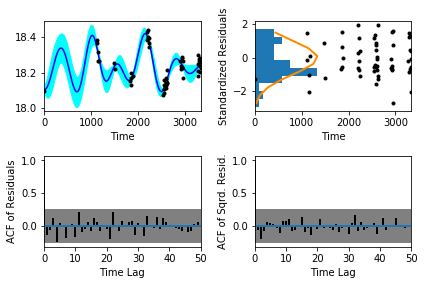

In [5]:
sample.assess_fit()

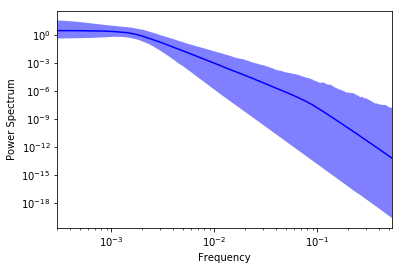

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_47417_Z')

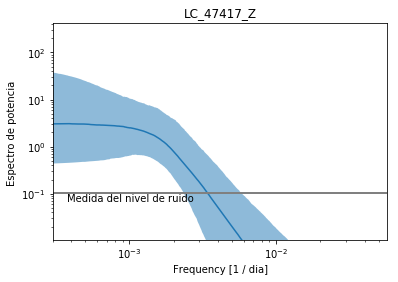

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_47417_Z')

Text(0.5,1,'Prediccion , valor esperado LC_47417_Z')

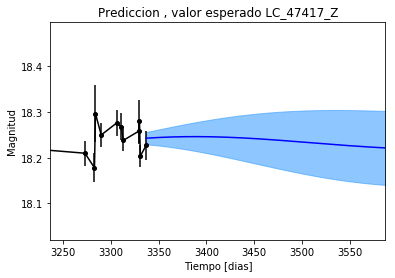

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_47417_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_47417_Z')

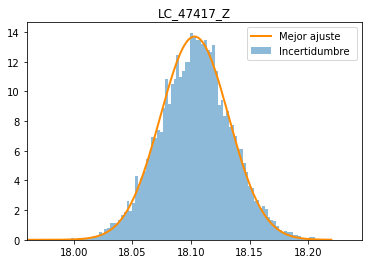

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_47417_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_Z')

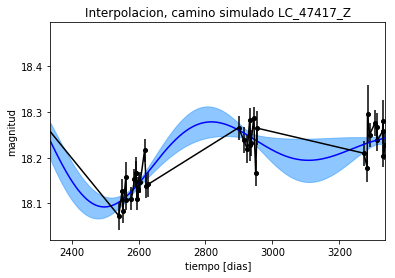

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_47417_Z')

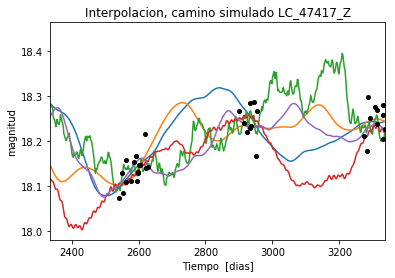

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_47417_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 756.848515575
Median: 0.00391803935622
Standard deviation: 0.142628283865
68% credibility interval: [ 0.00056246  0.06963395]
95% credibility interval: [  3.31692721e-04   5.36397318e-01]
99% credibility interval: [  3.07301087e-04   8.96195329e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 427.899455387
Median: 0.00173408267152
Standard deviation: 0.0757314626389
68% credibility interval: [ 0.00050281  0.02232669]
95% credibility interval: [ 0.00032416  0.22041334]
99% credibility interval: [  3.06619707e-04   5.37512168e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 189.009208249
Median: 0.00277551503864
Standar

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 719.329531221
Median: 125.528238603
Standard deviation: 2.00083906836
68% credibility interval: [ 123.47062474  127.356961  ]
95% credibility interval: [ 120.76547249  128.49208373]
99% credibility interval: [ 118.5976643   129.02425706]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 375.360757624
Median: 0.325419570418
Standard deviation: 1.93843134435
68% credibility interval: [ 0.03269695  2.90444084]
95% credibility interval: [ 0.01243652  6.73488786]
99% credibility interval: [  9.06325225e-03   9.62660979e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 316.401129774
Median: 0.190188694361
Standard deviation: 9.14563549278
68% credibility interval: [  5.83074216e-03   7.73436617e+00]
95% credibility interv

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10402.1410653
Median: 5.75527043209e-42
Standard deviation: 3.45724621052e+51
68% credibility interval: [  5.39735853e-93   3.47304039e-11]
95% credibility interval: [  5.78199880e-136   1.28089180e+000]
99% credibility interval: [  2.57384478e-179   3.71305812e+001]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2074.7404712
Median: 18.2281553596
Standard deviation: 0.0537273249335
68% credibility interval: [ 18.18623834  18.26681497]
95% credibility interval: [ 18.11488155  18.32842229]
99% credibility interval: [ 18.04120268  18.40056549]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 218.977417308
Median: 0.00457445568307
Standard deviation: 0.257466128249
68% credibility interval: [ 0.          0.38127708]
95% credibility interval: [ 0.          0.91158978]
99% credibility interval: [ 0.          1.02911853]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 218.977417308
Median: 0.00457445568307
Standard deviation: 0.257466128249
68% credibility interval: [ 0.          0.38127708]
95% credibility interval: [ 0.          0.91158978]
99% credibility interval: [ 0.          1.02911853]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 404.53637279
Median: 0.0
Standard deviation: 0.000763411085836
68% c

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 719.329531221
Median: 125.528238603
Standard deviation: 2.00083906836
68% credibility interval: [ 123.47062474  127.356961  ]
95% credibility interval: [ 120.76547249  128.49208373]
99% credibility interval: [ 118.5976643   129.02425706]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1084.11457068
Median: 0.01254867027
Standard deviation: 0.0208792176315
68% credibility interval: [ 0.00709977  0.02537447]
95% credibility interval: [ 0.00431329  0.06310084]
99% credibility interval: [ 0.00339357  0.13305312]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2088.23785682
Median: 1.09770961725
Standard deviation: 0.166327795456
68% credibility interval: [ 0.94582372  1.26888854]
95% credibility interval: [ 0.82818034  1.47726793]
99% credibility interval: [ 0.76316461  1.64152515]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 3212.40052804
Median: 3.08840571544e-05
Standard deviation: 0.0146271783507
68% credibility interval: [  7.07877259e-07   1.33948494e-03]
95% credibility interval: [  1.72284741e-08   7.15189522e-03]
99% credibility interval: [  7.15806500e-09   2.50498389e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 756.848515575
Median: (-0.024617767316-0.353786506652j)
Standard deviation: 1.84934578883
68% credibility interval: [-0.43752302-4.55773831j -0.00353404-0.00900396j]
95% credibility interval: [ -3.37028375e+00-6.15451883j  -2.08408683e-03-1.93224458j]
99% credibility interval: [ -5.63096132e+00+0.j          -1.93082968e-03-0.00940111j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 427.899455387
Median: (-0.0108955627631+0.577383187783j)
Standard deviation: 1.68623722606
68% credibility interval: [-0.14028270+0.33303596j -0.00315923+0.01135594j]
95% credibility interval: [-1.38489786+2.38377731j -0.00203674+0.03495621j]
99% credibility interval: [ -3.37728855e+00+1.65248608j  -1.92654844e-03+5.37308434j]
Posterior sum